# Data Analysis

The aim of this Capstone project is to consolidate the knowledge, skills and competences acquired by learners during this programme. In this project students will select, specify, design, justify and implement a data analytics investigation that makes use of large data sets. The project will necessarily require data ingestion, wrangling, computation and analyses, and the production and presentation of a project and report. Students are guided by faculty in the selection of a data set, scope of investigation, initial exploratory data analysis, and formulation of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
import re

In [2]:
deck_df = pd.read_csv("data/data_decks_cleaned.csv")

Lets see if we can plot anything

In [3]:
%matplotlib inline

In [4]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,house_shadows,...,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,1,True
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,False,...,0,0,0,0,0,0,0,0,-2,True
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,False,...,0,0,0,0,0,0,0,1,1,True
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,False,...,0,0,0,0,0,0,0,0,0,True
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,True,...,0,1,0,0,0,0,1,0,4,False


In [5]:
deck_df.describe()

,deck_wins,deck_losses,1-2 Punch,A Fair Game,Abond the Armorsmith,Agent Hoo-man,Ammonia Clouds,Anahita the Trader,Ancient Bear,Ancient Yurk,...,Zorg,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score
count,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,...,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000
mean,2.520833,2.340949,0.066294,0.025638,0.070513,0.066606,0.103593,0.007977,0.139615,0.009447,...,0.064660,0.068909,0.115061,0.010101,0.023633,0.073424,0.028253,0.123127,0.075638,0.179884
std,2.452996,1.786724,0.298569,0.160109,0.309012,0.300557,0.368056,0.089952,0.434456,0.099014,...,0.266174,0.305654,0.393665,0.103355,0.164938,0.311640,0.179880,0.411228,0.321604,2.468806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,40.000000,39.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.000000,...,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,5.000000,4.000000,26.000000


In [6]:
decks = deck_df[['deck_wins','deck_losses', 'score', 'expansion']]
decks.head()

,deck_wins,deck_losses,score,expansion
0,2,1,1,True
1,1,3,-2,True
2,2,1,1,True
3,4,4,0,True
4,8,4,4,False


In [7]:
deck_exp = decks.groupby('expansion')
deck_exp.size()

expansion
False    43749
True     23572
dtype: int64

In [8]:
deck_exp_totals = deck_exp.sum()
deck_exp_totals.head()

,deck_wins,deck_losses,score
expansion,,,
False,118512,106001,12511
True,51193,51594,-401


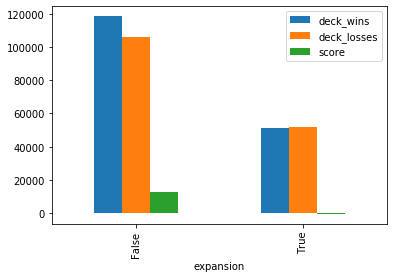

In [9]:
my_plot = deck_exp_totals.plot(kind='bar')

In [10]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,house_shadows,...,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,1,True
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,False,...,0,0,0,0,0,0,0,0,-2,True
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,False,...,0,0,0,0,0,0,0,1,1,True
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,False,...,0,0,0,0,0,0,0,0,0,True
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,True,...,0,1,0,0,0,0,1,0,4,False


---------------------

Guide for random forests used here: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf=RandomForestClassifier(n_estimators=100)

In [14]:
x = deck_df
x = x.drop("deck_id", axis=1)
x = x.drop("deck_name", axis=1)
x = x.drop("deck_wins", axis=1)
x = x.drop("deck_losses", axis=1)
x = x.drop("score", axis=1)
y = deck_df[['score']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [16]:
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

get a regression value - r square version. 

In [17]:
y_pred=clf.predict(x_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.11162816762412486


try a few different models to see what would work - neural net? might try something online.


In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Mother                   0.006501
Labwork                  0.005785
Dust Imp                 0.005450
Shooler                  0.005386
Charette                 0.005209
Punch                    0.005072
Wild Wormhole            0.005042
Titan Mechanic           0.004845
Miasma                   0.004785
Nerve Blast              0.004782
Library of Babble        0.004747
Ganger Chieftain         0.004727
Regrowth                 0.004625
Umbra                    0.004544
Blinding Light           0.004533
Full Moon                0.004516
Bad Penny                0.004434
Gauntlet of Command      0.004418
Protect the Weak         0.004337
Take Hostages            0.004303
Tremor                   0.004206
Coward’s End             0.004145
Save the Pack            0.004136
Shield of Justice        0.004077
Yxilx Dominator          0.003945
Lash of Broken Dreams    0.003944
Niffle Ape               0.003920
Urchin                   0.003859
Mindwarper               0.003814
Vezyma Thinkdr

---------

Instead of looking at all the cards, lets try a simplier model using just the houses

In [20]:
x = deck_df[['house_brobnar','house_dis','house_sanctum','house_mars','house_untamed','house_shadows', 'house_logos']]
y = deck_df[['score']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=clf.predict(x_test)

In [23]:
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.10779119392807957


In [24]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows    0.385861
house_mars       0.145943
house_dis        0.104791
house_brobnar    0.098323
house_logos      0.092677
house_untamed    0.086616
house_sanctum    0.085789
dtype: float64

No handles with labels found to put in legend.


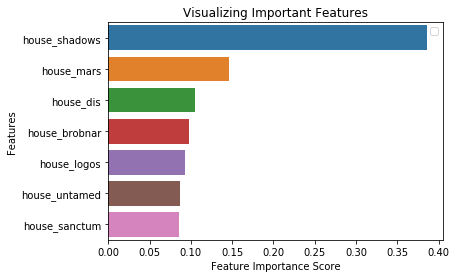

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Despite the poor predictive performance, the model has indicated the shadows house is the most important feature which matches the experience of players of the game.

Lets try a simple GLM

In [35]:
X = deck_df
X = X.drop("deck_id", axis=1)
X = X.drop("deck_name", axis=1)
X = X.drop("deck_wins", axis=1)
X = X.drop("deck_losses", axis=1)
X = X.drop("score", axis=1)
X = X.drop("house_shadows", axis=1)
X = X.drop("house_mars", axis=1)
X = X.drop("house_untamed", axis=1)
X = X.drop("house_logos", axis=1)
X = X.drop("house_dis", axis=1)
X = X.drop("house_sanctum", axis=1)
X = X.drop("house_brobnar", axis=1)
X = X.drop("expansion", axis=1)

y = deck_df[['score']]

In [36]:
from sklearn import linear_model

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [38]:
predictions = lm.predict(X)
print(predictions)

[[-0.46853113]
 [-0.15852094]
 [ 0.56536913]
 ...
 [ 1.02344751]
 [-1.12119007]
 [-1.51481128]]


In [39]:
lm.score(X,y)

0.11821184764333414

In [40]:
coefDF = pd.DataFrame({'feature':X.columns, 'coef':lm.coef_[0]})

In [41]:
coefDF.sort_values(by=['coef'], ascending=False)

,feature,coef
214,Horseman of Pestilence,1.552159e+12
510,Timetraveller,6.127605e+11
19,Bait and Switch,3.446623e+07
278,Martian Generosity,3.446623e+07
393,Relentless Whispers,3.446623e+07
311,Nature’s Call,3.446623e+07
144,Finishing Blow,3.446623e+07
218,Hypnotic Command,3.446623e+07
372,Proclamation 346E,3.446623e+07
258,Lights Out,3.446623e+07


Despite the poor performance of the overall model, the list of coefficients does reflect the accepted wisdom of the player base who prize the card 'Bait and switch' above all others. The Dis Ambassador on the other hand which is at the very bottom of the rankings is a highly situational card that often is dissapointing to draw.

In [42]:
import pickle
filename = 'finalized_linear_model.sav'
pickle.dump(lm, open(filename, 'wb'))